In [64]:
import numpy as np
from sklearn.datasets import make_classification

In [65]:
X,y = make_classification(n_samples=100,
                        n_features=2,
                        n_informative=1,
                        n_redundant=0,
                        n_classes=2,
                        n_clusters_per_class=1,
                        hypercube=False,
                        random_state=41,
                        class_sep=20)

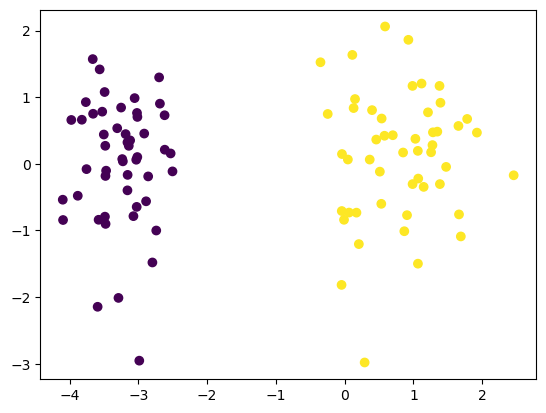

In [66]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

In [67]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [68]:
def step(z):
    return 1 if z > 0 else 0

In [69]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    epochs = 1000
    lr = 0.01
    for i in range(epochs):
        point = np.random.randint(0,X.shape[0])
        y_hat = step(np.dot(X[point],weights))
        weights = weights + lr * (y[point] - y_hat) * X[point]
    return weights[1:],weights[0]

In [70]:
w,b = perceptron(X,y)

In [71]:
w,b

(array([1.02488915, 0.53841002]), 1.1900000000000002)

In [72]:
m = -w[0]/w[1]
c = -b/w[1]

(-4.0, 4.0)

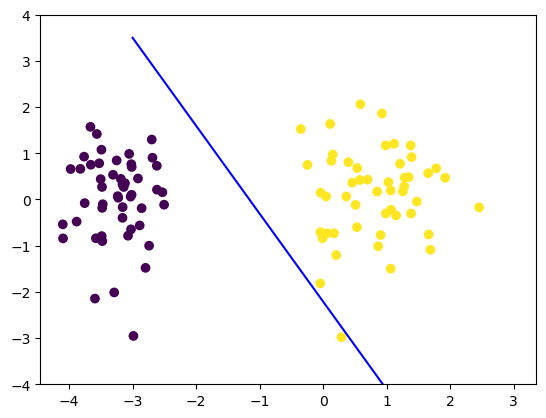

In [73]:
x_in = np.linspace(-3,3,100)
y_in_percep = m * x_in + c
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_in,y_in_percep,c='blue')
plt.ylim(-4,4)

Implementng using sigmoid

In [74]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    epochs = 1000
    lr = 0.01
    for i in range(epochs):
        point = np.random.randint(0,X.shape[0])
        y_hat = sigmoid(np.dot(X[point],weights))
        weights = weights + lr * (y[point] - y_hat) * X[point]
    return weights[1:],weights[0]

In [75]:
w,b = perceptron(X,y)
w,b

(array([1.79815223, 0.59039672]), 1.4094727383577126)

In [76]:
m = -w[0]/w[1]
c = -b/w[1]

(-4.0, 4.0)

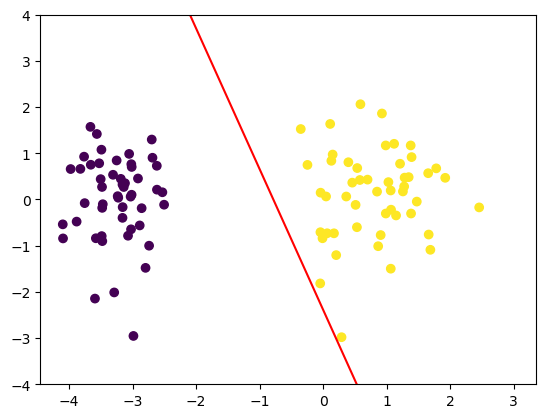

In [77]:
x_in = np.linspace(-3,3,100)
y_in_sig = m * x_in + c
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_in,y_in_sig,c='red')
plt.ylim(-4,4)

Now, lets use sklearn's LogisticRegression model and see

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression()
lr.fit(X,y)
w = lr.coef_
b = lr.intercept_
w,b

(array([[2.36679363, 0.02300492]]), array([3.13571596]))

In [80]:
m = -w[0][0]/w[0][1]
c = -b/w[0][1]

(-4.0, 4.0)

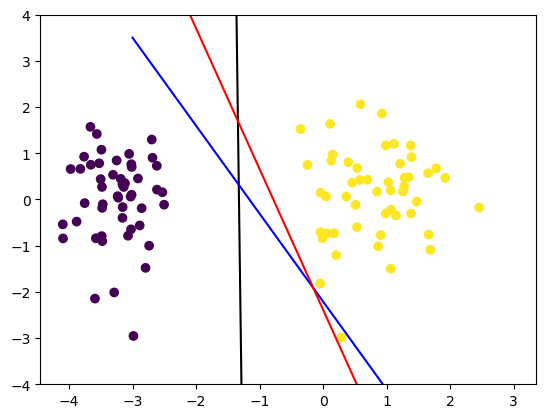

In [82]:
x_in = np.linspace(-3,3,100)
y_in_lr = m * x_in + c
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_in,y_in_lr,c='black')
plt.plot(x_in,y_in_percep,c = 'blue')
plt.plot(x_in,y_in_sig,c='red')
plt.ylim(-4,4)

Here we see that sigmoid (red) has made some improvement over the the normal perceptron trick (blue), but sill is far from what the actual LogisticRegression has implemented